In [1]:
#Loaded the appropriate packages for analysis
library(tidyverse)
library(tidymodels)
library(dplyr)
library(purrr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
#Read the data, and added colummn names/headings
cleveland<-read.delim("processed.cleveland.data", header=FALSE, sep=",")
cleveland<- rename(cleveland, 
                   age= V1,
                   sex= V2,
                   cp= V3,
                   trestbp= V4,
                   chol= V5,
                   fbs= V6,
                   restecg= V7,
                thalach= V8,
                   exang = V9,
                   oldpeak = V10,
                   slope =V11,
                   ca = V12,
                   thal = V13,
                   num= V14) 
#Converted the num column(which tells us the severity and if the patient has heart disease) to a factor
cleveland|> mutate(num=as_factor(num))
head(cleveland)

age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


,age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


Note that 0 means no heart disease, and 1-4 mean increasing levels of heart disease

In [3]:
#check for NA values
NA_<-sum(is.na(cleveland))
NA_

[1] 0

There are no NA values in our dataset, therefore we will not need to use any functions to account for NA values.

In [4]:
#selected only the columns that we will be using for our analysis

cleveland_0and4<-cleveland|> select(age, trestbp, chol, fbs, num)|>mutate(num=as_factor(num))|> filter(num=="0"|num=="4")
cleveland_0and4

age,trestbp,chol,fbs,num
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,1,0
37,130,250,0,0
41,130,204,0,0
56,120,236,0,0
57,120,354,0,0
57,140,192,0,0
56,140,294,0,0
44,120,263,0,0
52,172,199,1,0


In [5]:
#Is the data balanced?
cleveland_balancecheck_0and4<- cleveland|> group_by(num)|> summarize(count=n()) |>filter(num=="0"|num=="4")
cleveland_balancecheck_0and4
#The data is heavily imbalanced.

num,count
<int>,<int>
0,164
4,13


It might be better to use the numbers 0 and 3 or 0 and 2 or 0 and 1 for the presence and absence of heart disease. This is because severe heart disease might be very rare, and this classifier might be more helpful to the public if we use a numbers 2 or 3 which denote less severe heart disease, which is more common. This might also fix the issue of severe imbalance.


In [6]:
#0 and 3 test
cleveland_0and3<-cleveland|> select(age, trestbp, chol, fbs, num)|>mutate(num=as_factor(num))|> filter(num=="0"|num=="3")
#balance check
cleveland_balancecheck_0and3<- cleveland_0and3|> group_by(num)|> summarize(count=n())
cleveland_balancecheck_0and3

#0 and 2 test
cleveland_0and2<-cleveland|> select(age, trestbp, chol, fbs, num)|>mutate(num=as_factor(num))|> filter(num=="0"|num=="2")
cleveland_0and2
#balance check
cleveland_balancecheck_0and2<- cleveland_0and2|> group_by(num)|> summarize(count=n())
cleveland_balancecheck_0and2

#0 and 1 test
cleveland_0and1<-cleveland|> select(age, trestbp, chol, fbs, num)|>mutate(num=as_factor(num))|> filter(num=="0"|num=="1")
cleveland_0and1
#balance check
cleveland_balancecheck_0and1<- cleveland_0and1|> group_by(num)|> summarize(count=n())
cleveland_balancecheck_0and1

num,count
<fct>,<int>
0,164
3,35


age,trestbp,chol,fbs,num
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,1,0
67,160,286,0,2
37,130,250,0,0
41,130,204,0,0
56,120,236,0,0
57,120,354,0,0
63,130,254,0,2
57,140,192,0,0
56,140,294,0,0


num,count
<fct>,<int>
0,164
2,36


age,trestbp,chol,fbs,num
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,1,0
67,120,229,0,1
37,130,250,0,0
41,130,204,0,0
56,120,236,0,0
57,120,354,0,0
53,140,203,1,1
57,140,192,0,0
56,140,294,0,0


num,count
<fct>,<int>
0,164
1,55


This data is still imbalanced, therefore we will try to combine the numbers 1-4 as yes heart disease and have the number 0 be no heart disease. We will do this through making a new column denoting named, "heart disease", we will then assign numbers 1-4 as yes and number 0 as no.

In [7]:
#combine 1-4 as disease and 0 as no disease
disease<- c(1:4)
no_disease<- c(0)
#check balance
cleveland_yes_no<-cleveland|> select(age, trestbp, chol, fbs, num)|> mutate(heart_disease= if_else(num>0, "no disease", "disease"))|> mutate(heart_disease=as_factor(heart_disease))
cleveland_yes_no
#balance check
cleveland_balancecheck_yes_no<- cleveland_yes_no|> group_by(heart_disease)|> summarize(count=n())
cleveland_balancecheck_yes_no


age,trestbp,chol,fbs,num,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
63,145,233,1,0,disease
67,160,286,0,2,no disease
67,120,229,0,1,no disease
37,130,250,0,0,disease
41,130,204,0,0,disease
56,120,236,0,0,disease
62,140,268,0,3,no disease
57,120,354,0,0,disease
63,130,254,0,2,no disease


heart_disease,count
<fct>,<int>
disease,164
no disease,139


As is seen from above, this dataset is much more balanced not with only 25 observations different between one another. Therefore from now on we will use this grouping as our dataset to build our classifier.

In [66]:
cleveland<-cleveland_yes_no|> select(-num)
cleveland

age,trestbp,chol,fbs,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,1,disease
67,160,286,0,no disease
67,120,229,0,no disease
37,130,250,0,disease
41,130,204,0,disease
56,120,236,0,disease
62,140,268,0,no disease
57,120,354,0,disease
63,130,254,0,no disease


In [68]:
#setting the seed
set.seed(1)
#created training(75%) and testing data 
cleveland_split<- initial_split(cleveland, prop=0.75, strata= heart_disease)
cleveland_train<- training(cleveland_split)
cleveland_test<- testing(cleveland_split)

In [69]:
cleveland_train

,age,trestbp,chol,fbs,heart_disease
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,63,145,233,1,disease
4,37,130,250,0,disease
5,41,130,204,0,disease
11,57,140,192,0,disease
12,56,140,294,0,disease
16,57,150,168,0,disease
20,49,130,266,0,disease
21,64,110,211,0,disease
22,58,150,283,1,disease


In [70]:
#table containing the average values of all predictors of each severity of heart disease
average_predictors<-cleveland_train|> group_by(heart_disease)|>
summarize(across(age:fbs, mean))
average_predictors

heart_disease,age,trestbp,chol,fbs
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
disease,52.96748,130.4553,243.9106,0.1382114
no disease,57.23077,135.5096,250.5673,0.1538462


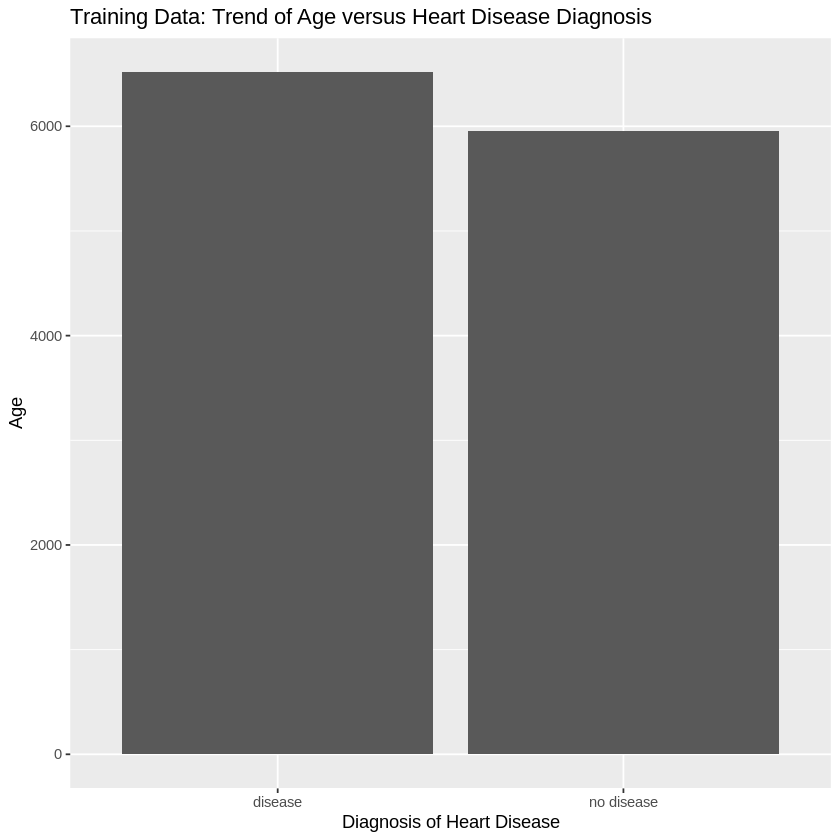

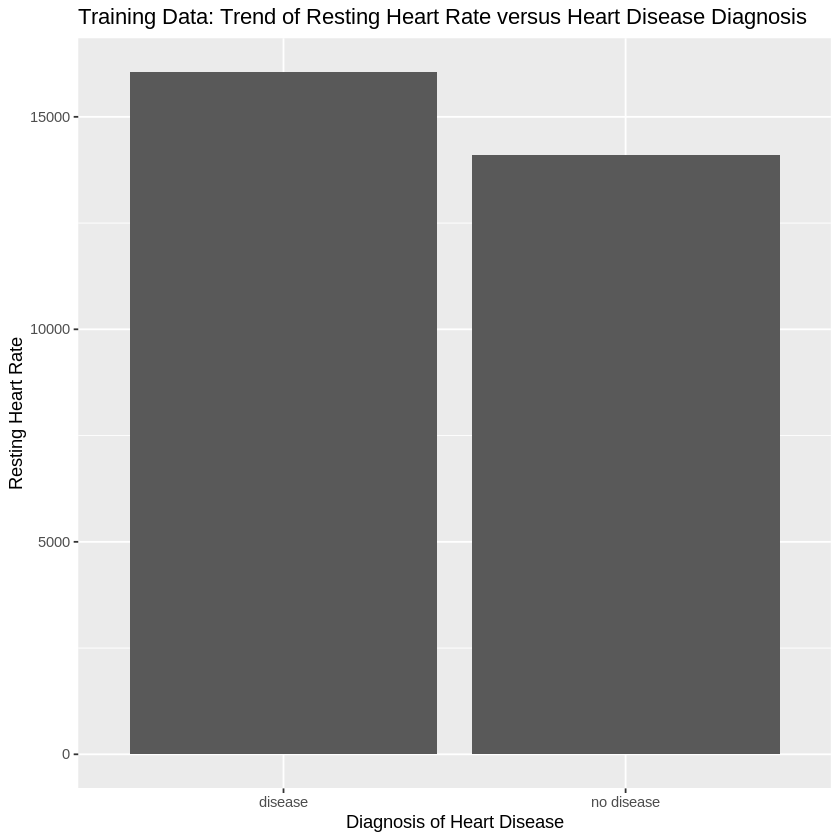

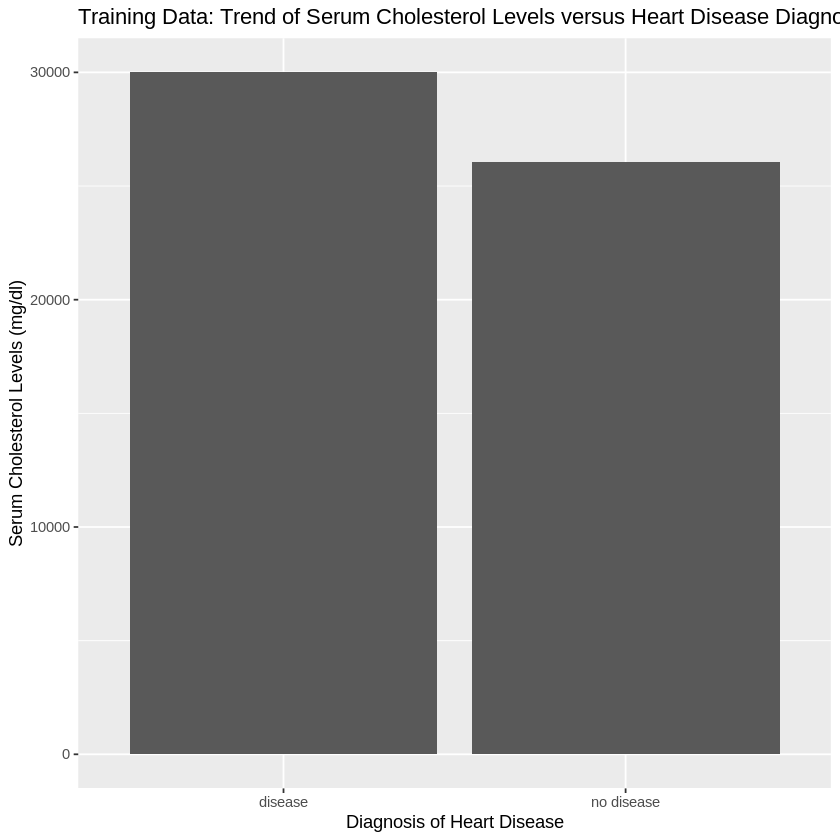

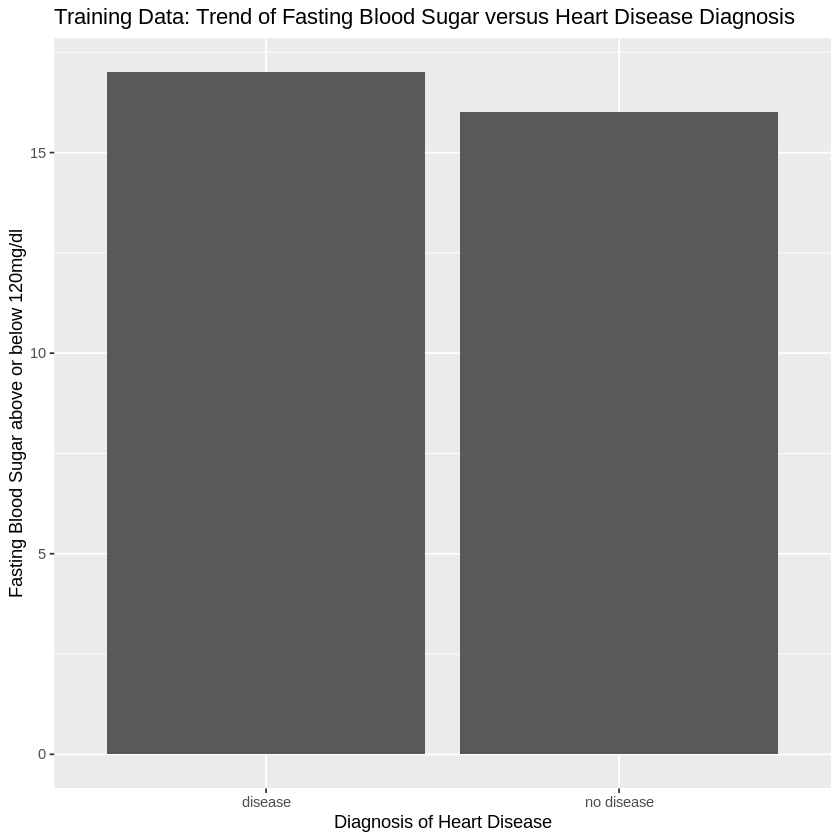

In [71]:
#graphs showing trends in predictor variables segregated by each class of heart disease severity. Note that each y-axis variable is the average value for each class of num 
cleveland_agenum_trend<- cleveland_train|> ggplot(aes(x=heart_disease, y=age))+geom_bar(stat="identity")+ labs(x="Diagnosis of Heart Disease", y="Age")+ ggtitle ("Training Data: Trend of Age versus Heart Disease Diagnosis")
cleveland_agenum_trend

cleveland_trestbpnum_trend<- cleveland_train|> ggplot(aes(x=heart_disease, y=trestbp))+geom_bar(stat="identity")+ labs(x="Diagnosis of Heart Disease", y="Resting Heart Rate")+ ggtitle ("Training Data: Trend of Resting Heart Rate versus Heart Disease Diagnosis")
cleveland_trestbpnum_trend

cleveland_cholnum_trend<- cleveland_train|> ggplot(aes(x=heart_disease, y=chol))+geom_bar(stat="identity")+ labs(x="Diagnosis of Heart Disease", y="Serum Cholesterol Levels (mg/dl)")+ ggtitle ("Training Data: Trend of Serum Cholesterol Levels versus Heart Disease Diagnosis")
cleveland_cholnum_trend

cleveland_fbsnum_trend<- cleveland_train|> ggplot(aes(x=heart_disease, y=fbs))+geom_bar(stat="identity")+ labs(x="Diagnosis of Heart Disease", y="Fasting Blood Sugar above or below 120mg/dl")+ ggtitle ("Training Data: Trend of Fasting Blood Sugar versus Heart Disease Diagnosis")
cleveland_fbsnum_trend

From the above plots, we can see that there is a difference between the predictor variables outlined above and the presence of disease and no disease. Therefore, we can know that there is a difference in these variables between those with and without heart disease. 

I will now proceed to build the classifier

In [87]:
#Splitting the data in order to perform a 5 fold cross-validation
cleveland_vfold<- vfold_cv(cleveland_train, v=5, strata=heart_disease)

#creating the recipe to do conduct the cross validation
cleveland_recipe<- recipe(heart_disease~.,data=cleveland_train)|> step_scale(all_predictors())|> step_center(all_predictors())

#creating the model 
cleveland_spec<- nearest_neighbor(weight_func="rectangular", neighbors=tune())|> set_engine("kknn")|> set_mode("classification")

#number of neighbours/k values to try
k_values<- tibble(neighbors=seq(from=5, to=20, by=1))

#adding them to a workflow
cleveland_workflow<- workflow()|> add_recipe(cleveland_recipe)|> add_model(cleveland_spec)|> tune_grid(resample=cleveland_vfold, grid=k_values)|> collect_metrics()

In [88]:
cleveland_metrics<- cleveland_workflow|> filter(.metric=="accuracy")|> arrange(desc(mean))|> select(neighbors, mean)
cleveland_metrics

neighbors,mean
<dbl>,<dbl>
19,0.5638779
20,0.5638779
17,0.5551866
18,0.5551866
15,0.5292929
16,0.5292929
7,0.5155643
8,0.5155643
11,0.5069697


From the above cross validation, we can see that we should use K=5 as it has the highest accuracy. Below we will retain the model.

In [89]:
#create a new model and workflow
cleveland_specvalidated<- nearest_neighbor(weight_func="rectangular", neighbors=5)|> set_engine("kknn")|> set_mode("classification")

cleveland_workflowvalidated<- workflow()|> add_recipe(cleveland_recipe)|> add_model(cleveland_specvalidated)|> fit(data=cleveland_train)

In [90]:
#test the model on the testing set

cleveland_predict<- predict(cleveland_workflowvalidated, cleveland_test)|> bind_cols(cleveland_test)

#collect prediction metrics
prediction_metrics<- cleveland_predict|> metrics(truth=heart_disease, estimate=.pred_class)|> filter(.metric=="accuracy")|> select(.estimate)
prediction_metrics
#our classifier is 97% accurate, when using our test set to compute the accuracy of the retrained model

.estimate
<dbl>
0.5131579


In [91]:
#make a confusion matrix for a visual representation of the accuracy of the model
cleveland_confmatrix<- cleveland_predict|> conf_mat(truth=heart_disease, estimate=.pred_class)
print(cleveland_confmatrix)

            Truth
Prediction   disease no disease
  disease         24         20
  no disease      17         15


From looking at the conufsion matrix show above, we can say that our classifier is extremely accurate, as it only identified 2 observations wrong out of a total of 77 predictions attempted. This is an accuracy of 0.974026, which was computed in the varibles, prediction_metrics. Below we will now create some new observations and predict whether these patients have heart disease. 

In [84]:
#creating 7 random observations in a tibble format for the classifier to predict
newage<- c(44, 66,50,80,20,16,80)
newfbs<- c(0,1,1,0,1,0,1)
newtrestbp<- c(120, 50,60,70, 30,66,99)
newchol<- c(100,200, 150,250,300,239,167)
new_obs<- tibble(age=newage, fbs=newfbs, trestbp=newtrestbp, chol=newchol)

In [86]:
randomobs_prediction<- predict(cleveland_workflowvalidated, new_obs)
randomobs_prediction

.pred_class
<fct>
disease
disease
disease
disease
disease
disease
disease


According to our classifier they will all be diseased  patients.